In [1]:
# import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# sns.set_style("whitegrid")

from attrdict import AttrDict
from drivers import *
import os
import seaborn as sns
import results

/Users/lguerdan/.virtualenvs/10701-Project/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<AxesSubplot:xlabel='NS', ylabel='ACC'>

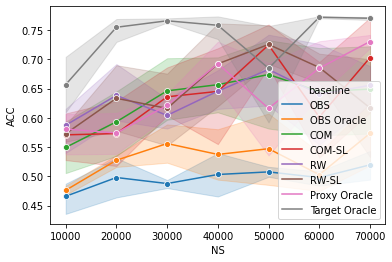

In [14]:
df, meandf  = results.get_erm_convergence_result_df('erm_convergence_rates_no_crossfit_beta3_alpha1')

df.reset_index(inplace=True)
sns.lineplot(data=df, x="NS", y="ACC", hue='baseline', ci=95, marker='o')

In [3]:
from attrdict import AttrDict


exp_config = AttrDict({

    # Benchmark configuration
    'benchmark': {
        'name': 'synthetic_1D_sinusoidal',
        'NS': 1000,
        'config': {
            'Y0_PDF': 'piecewise_sinusoid',
            'Y1_PDF': 'low_base_rate_sinusoid',
            'PI_PDF': 'linear'
            }
    },

    'log_dir': 'results',

    'sample_sizes': [5000, 10000, 20000, 30000, 40000, 50000, 60000],
    
    # Experimental setup 
    'learn_weights': True,
    'learn_parameters': True,
    
    # Hyperparameters
    'n_epochs': 3,
    'n_runs': 1,
    
    'target_POs': [0],
    'policy_gamma': 0,
   
    # Data params
    'train_ratio': .7,
    'split_erm': True,
    'crossfit_erm': True,
    'split_ccpe': True,
    'crossfit_ccpe': True,

    'error_params': [{
        'alpha_0': 0.5,
        'alpha_1': 0,
        'beta_0': 0.1,
        'beta_1': 0 
    }],

    'baselines': [{
            'model': 'OBS',
            'target': 'Y',
            'conditional': False,
            'sl': False,
            'reweight': False
        },{
            'model': 'OBS Oracle',
            'target': 'YS',
            'conditional': False,
            'sl': False,
            'reweight': False
        },{
            'model': 'COM',
            'target': 'Y',
            'conditional': True,
            'sl': False,
            'reweight': False
        },{
            'model': 'COM-SL',
            'target': 'Y',
            'conditional': True,
            'sl': True,
            'reweight': False
        },{
            'model': 'RW',
            'target': 'Y',
            'conditional': True,
            'sl': False,
            'reweight': True
        },{
            'model': 'RW-SL',
            'target': 'Y',
            'conditional': True,
            'sl': True,
            'reweight': True
        },{
            'model': 'Proxy Oracle',
            'target': f'Y',
            'conditional': True,
            'sl': False,
            'reweight': False
        },{
            'model': 'Target Oracle',
            'target': f'YS',
            'conditional': True,
            'sl': False,
            'reweight': False
    }]
})

In [ ]:
exp_config = AttrDict({
#     'benchmark': {
#         'name': 'synthetic_1D_sinusoidal',
#         'NS': 1000,
#         'config': {
#             'Y0_PDF': 'piecewise_sinusoid',
#             'Y1_PDF': 'low_base_rate_sinusoid',
#             'PI_PDF': 'linear'
#             }
#     },
    
    'benchmark': {
        'name': 'synthetic_2D_linsep',
        'NS': 5000,
        'config': {
            'Y0_PDF': '2D_linsep_baseline',
            'Y1_PDF': '2D_linsep_intervention',
            'PI_PDF': '6cov_linear'
        }
    },
    
    'log_dir': 'results',
    
    # Experimental setup 
    'learn_weights': True,
    'learn_parameters': True,
    
    # Hyperparameters
    'n_epochs': 3,
    'n_runs': 1,
    
    'target_POs': [0, 1],
    
    'policy_gamma': 0,
    'train_ratio': .7,
    
    'split_erm': True,
    'crossfit_erm': True,
    'split_ccpe': True,
    'crossfit_ccpe': True,
})

error_params = [AttrDict({
    'alpha_0': 0.5,
    'alpha_1': 0,
    'beta_0': 0.1,
    'beta_1': 0 
})]

# baselines = [AttrDict({
#     'model': 'OBS',
#     'target': 'Y',
#     'conditional': False,
#     'sl': False,
#     'reweight': False
# }), AttrDict({
#     'model': 'OBS Oracle',
#     'target': 'YS',
#     'conditional': False,
#     'sl': False,
#     'reweight': False
# }), AttrDict({
#     'model': 'COM',
#     'target': 'Y',
#     'conditional': True,
#     'sl': False,
#     'reweight': False
# }), AttrDict({
#     'model': 'COM-SL',
#     'target': 'Y',
#     'conditional': True,
#     'sl': True,
#     'reweight': False
# }), AttrDict({
#     'model': 'RW',
#     'target': 'Y',
#     'conditional': True,
#     'sl': False,
#     'reweight': True
# }), AttrDict({
#     'model': 'RW-SL',
#     'target': 'Y',
#     'conditional': True,
#     'sl': True,
#     'reweight': True
# }), AttrDict({
#     'model': 'Proxy Oracle',
#     'target': f'Y',
#     'conditional': True,
#     'sl': False,
#     'reweight': False
# }), AttrDict({
#     'model': 'Target Oracle',
#     'target': f'YS',
#     'conditional': True,
#     'sl': True,
#     'reweight': False
# })]
baselines = [AttrDict({
    'model': 'Target Oracle',
    'target': f'YS',
    'conditional': True,
    'sl': False,
    'reweight': False
})]

po_results, te_results =  run_risk_minimization_exp(exp_config, baselines, error_params, exp_name='synth_baseline_comparison')

